# Prerequirments

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision.transforms import functional as F
from matplotlib.animation import FuncAnimation
from functools import partial
from IPython.display import HTML

In [2]:
def show_data(X, y, b, bhat=None):
    if bhat != None:
        if bhat.grad != None:
            fig, axs = plt.subplots(1, 5, figsize=(2 * 5, 6))
        else:
            fig, axs = plt.subplots(1, 4, figsize=(2 * 4, 6))
    else:
        fig, axs = plt.subplots(1, 3, figsize=(2 * 3, 6))

    # Plot X
    axs[0].imshow(F.to_pil_image(X), cmap='hot')
    axs[0].set_title('X')
    axs[0].axis('off')

    # Plot b
    b_show = torch.ones(X.shape)
    b_show[:b.shape[0], int(X.shape[1] / 2)] = b.reshape(-1)
    axs[1].imshow(F.to_pil_image(b_show), cmap='hot', aspect=1)
    axs[1].set_title('b')
    axs[1].axis('off')

    if bhat != None:
        # plot bhat
        bhat_show = torch.ones(X.shape)
        bhat_show[:bhat.shape[0], int(X.shape[1] / 2)] = bhat.reshape(-1)
        axs[2].imshow(F.to_pil_image(bhat_show), cmap='hot', aspect=1)
        axs[2].set_title('bhat')
        axs[2].axis('off')

        if bhat.grad != None:
            # plot bhat.grad
            bhatg_show = torch.ones(X.shape)
            bhatg_show[:bhat.grad.shape[0], int(X.shape[1] / 2)] = bhat.grad.reshape(-1)
            axs[3].imshow(F.to_pil_image(bhatg_show), cmap='hot', aspect=1)
            axs[3].set_title('bhat.grad')
            axs[3].axis('off')

    # Plot y
    y_show = torch.ones(X.shape)
    y_show[:y.shape[0], int(X.shape[1] / 2)] = y.reshape(-1)
    axs[-1].imshow(F.to_pil_image(y_show), cmap='hot')
    axs[-1].set_title('y')
    axs[-1].axis('off')

    return fig, axs

In [3]:
def show_params(b, bhat):
    fig, axs = plt.subplots(1, 3, figsize=(3, 3))

    # Plot b
    axs[0].clear()
    axs[0].imshow(F.to_pil_image(b), cmap='hot')
    axs[0].set_title('b')
    axs[0].axis('off')

    # Plot bhat
    axs[1].clear()
    axs[1].imshow(F.to_pil_image(bhat.clone().detach()), cmap='hot')
    axs[1].set_title('bhat')
    axs[1].axis('off')

    # Plot bhat.grad
    axs[2].clear()
    axs[2].imshow(F.to_pil_image(bhat.grad), cmap='hot')
    axs[2].set_title('bhat.grad')
    axs[2].axis('off')

    return fig, axs

In [4]:
def update(i, fig, axs, bhats, bhat_grads):

    # Plot bhat
    axs[1].clear()
    axs[1].imshow(F.to_pil_image(bhats[i]), cmap='hot')
    axs[1].set_title('bhat')
    axs[1].axis('off')

    # Plot bhat.grad
    axs[2].clear()
    axs[2].imshow(F.to_pil_image(bhat_grads[i]), cmap='hot')
    axs[2].set_title('bhat.grad')
    axs[2].axis('off')

def animate(b, bhats, bhat_grads):
    fig, axs = plt.subplots(1, 3, figsize=(3, 3))

    # Plot b
    axs[0].clear()
    axs[0].imshow(F.to_pil_image(b), cmap='hot')
    axs[0].set_title('b')
    axs[0].axis('off')

    anim = partial(update, fig=fig, axs=axs, bhats=bhats, bhat_grads=bhat_grads)
    ani = FuncAnimation(fig, anim, frames=len(bhats), interval=100, repeat=False)
    return ani.to_html5_video()

# Difine Matrices

In [5]:
n = 20
p = 5
X = torch.rand(n, p) * 10
b = torch.rand(p, 1) * 10
y = X @ b

/tmp/ipykernel_208425/3239535271.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


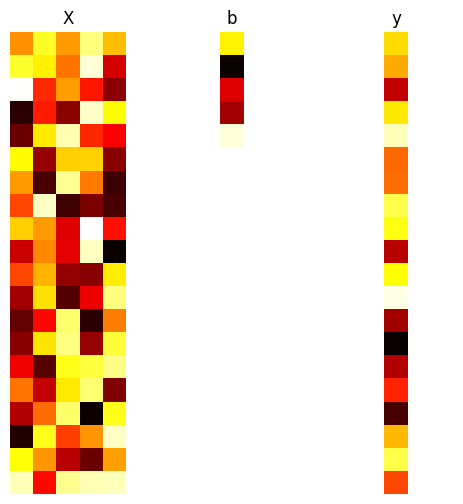

In [6]:
fig, axs = show_data(X, y, b)

fig.show()

In [7]:
b

tensor([[9.8259],
        [5.2419],
        [5.4865],
        [6.4225],
        [6.9975]])

# Basic Linear Regression

In [8]:
bhat = torch.rand(p, 1, requires_grad=True)
bhat

tensor([[0.9458],
        [0.3622],
        [0.5623],
        [0.8986],
        [0.3020]], requires_grad=True)

/tmp/ipykernel_208425/68080559.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


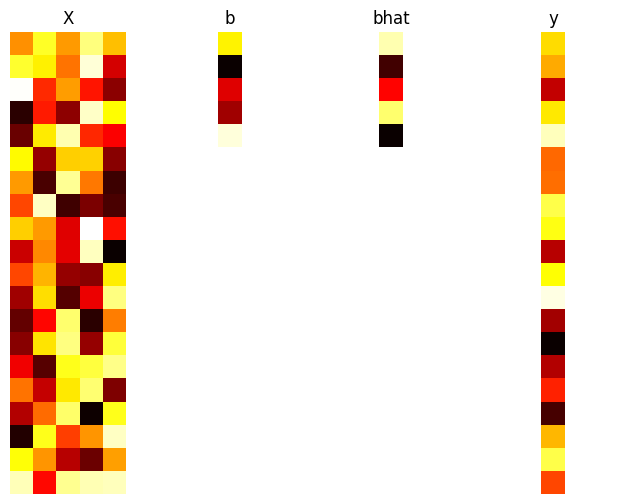

In [9]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

In [10]:
print(f'Requred grad of bhat is {bhat.requires_grad}')
print(f'But Requred grad of b is {b.requires_grad}')

Requred grad of bhat is True
But Requred grad of b is False


## Calculate Loss

In [11]:
bhat.grad

In [12]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss

tensor([[590621.6250]], grad_fn=<MmBackward0>)

In [13]:
loss.backward()

In [14]:
bhat.grad

tensor([[-40312.9570],
        [-45247.7461],
        [-38936.4180],
        [-34920.9648],
        [-32533.2715]])

/tmp/ipykernel_208425/68080559.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


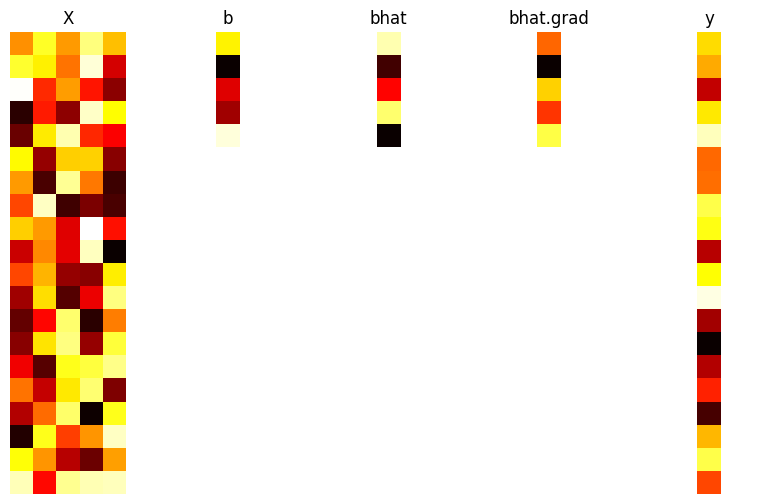

In [15]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

## Manually Update Bhat

In [16]:
bhat

tensor([[0.9458],
        [0.3622],
        [0.5623],
        [0.8986],
        [0.3020]], requires_grad=True)

In [17]:
bhat = (bhat - 0.001 * bhat.grad)
bhat = bhat.detach()

In [18]:
bhat.grad

In [19]:
bhat = bhat.requires_grad_(True)

In [20]:
bhat

tensor([[41.2587],
        [45.6099],
        [39.4987],
        [35.8195],
        [32.8353]], requires_grad=True)

### Iteratively

In [21]:
epoch = 200
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()
    bhat = (bhat - 0.0001 * bhat.grad).detach().requires_grad_(True)

/tmp/ipykernel_208425/68080559.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


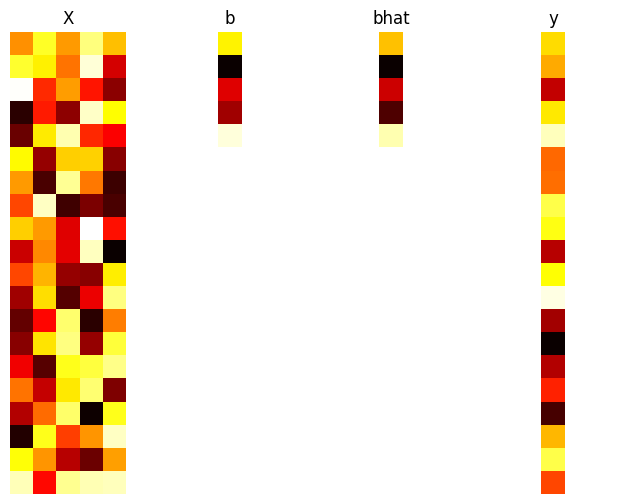

In [22]:
fig, axs = show_data(X, y, b, bhat)

fig.show()

### Iteratively with Detail

In [23]:
bhat = torch.rand(p, 1, requires_grad=True)

In [24]:
bhats = []
bhat_grads = []

epoch = 200
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()

    bhats.append(bhat.clone().float().detach())
    bhat_grads.append(bhat.grad.clone().detach())

    bhat = (bhat - 0.0001 * bhat.grad).clone().detach().requires_grad_(True)

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

4.5412 5.2854 4.4255 4.1490 3.9682 
6.0482 6.8947 5.8202 5.4117 5.1563 
6.6409 7.4563 6.3155 5.8686 5.6050 
6.8978 7.6346 6.4818 6.0309 5.7828 
7.0309 7.6731 6.5279 6.0856 5.8610 
7.1176 7.6607 6.5304 6.1011 5.9026 
7.1866 7.6302 6.5172 6.1026 5.9304 
7.2482 7.5935 6.4987 6.0992 5.9530 
7.3063 7.5550 6.4785 6.0943 5.9733 
7.3623 7.5161 6.4580 6.0891 5.9927 
7.4167 7.4776 6.4377 6.0840 6.0114 
7.4697 7.4397 6.4178 6.0792 6.0296 
7.5215 7.4023 6.3982 6.0747 6.0475 
7.5721 7.3655 6.3792 6.0705 6.0650 
7.6216 7.3293 6.3605 6.0667 6.0821 
7.6699 7.2937 6.3423 6.0632 6.0989 
7.7172 7.2587 6.3245 6.0600 6.1153 
7.7633 7.2244 6.3071 6.0571 6.1315 
7.8084 7.1905 6.2902 6.0545 6.1473 
7.8525 7.1573 6.2736 6.0522 6.1628 
7.8956 7.1246 6.2573 6.0501 6.1780 
7.9377 7.0925 6.2415 6.0482 6.1929 
7.9789 7.0608 6.2260 6.0467 6.2075 
8.0191 7.0298 6.2109 6.0453 6.2218 
8.0584 6.9992 6.1961 6.0442 6.2358 
8.0968 6.9692 6.1816 6.0433 6.2496 
8.1344 6.9397 6.1675 6.0426 6.2631 
8.1711 6.9106 6.1537 6.0421 

In [25]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

9.8259 5.2419 5.4865 6.4225 6.9975 

In [26]:
# pip install ffmpeg

RuntimeError: Requested MovieWriter (ffmpeg) not available

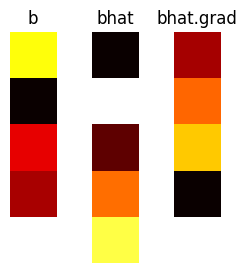

In [27]:
html_video = animate(b, bhats, bhat_grads)
HTML(html_video)

## Update Bhat Using Adam

In [28]:
from torch.optim import Adam

In [29]:
bhat = torch.rand(p, 1, requires_grad=True)

In [31]:
optimizer = Adam(params=[bhat], lr=0.1)

In [32]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss.backward()

/tmp/ipykernel_208425/2666425454.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


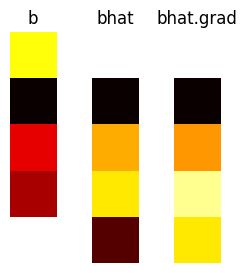

In [33]:
fig, axs = show_params(b, bhat)

fig.show()

In [34]:
optimizer.step()

/tmp/ipykernel_208425/2666425454.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


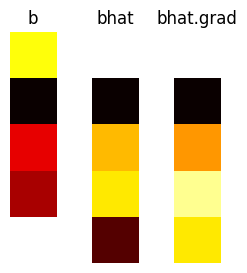

In [35]:
fig, axs = show_params(b, bhat)

fig.show()

### Zero Grad

In [38]:
bhat.grad

tensor([[-40374.7227],
        [-45231.4258],
        [-38901.2656],
        [-34990.7734],
        [-32439.9395]])

In [43]:
loss = (X @ bhat - y).T @ (X @ bhat - y)
loss.backward()

In [44]:
bhat.grad

tensor([[-159561.5312],
        [-178706.1250],
        [-153686.7500],
        [-138245.5000],
        [-128174.1719]])

In [45]:
optimizer.zero_grad()

In [46]:
bhat.grad

### Iteratively

In [47]:
epoch = 1000
for i in range(epoch):
    loss = (X @ bhat - y).T @ (X @ bhat - y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.9029 0.7270 0.8386 0.8514 0.7456 
1.0028 0.8269 0.9385 0.9513 0.8455 
1.1025 0.9267 1.0383 1.0510 0.9453 
1.2022 1.0263 1.1379 1.1506 1.0449 
1.3016 1.1257 1.2373 1.2501 1.1443 
1.4009 1.2250 1.3366 1.3493 1.2436 
1.4999 1.3240 1.4355 1.4483 1.3426 
1.5986 1.4227 1.5342 1.5470 1.4413 
1.6971 1.5211 1.6326 1.6454 1.5397 
1.7951 1.6191 1.7306 1.7434 1.6377 
1.8929 1.7168 1.8283 1.8411 1.7354 
1.9902 1.8140 1.9255 1.9383 1.8326 
2.0870 1.9108 2.0223 2.0351 1.9294 
2.1834 2.0071 2.1185 2.1314 2.0257 
2.2793 2.1028 2.2143 2.2271 2.1215 
2.3746 2.1980 2.3094 2.3224 2.2167 
2.4694 2.2926 2.4040 2.4170 2.3114 
2.5635 2.3866 2.4980 2.5109 2.4054 
2.6571 2.4799 2.5912 2.6043 2.4987 
2.7499 2.5726 2.6838 2.6969 2.5914 
2.8420 2.6645 2.7757 2.7888 2.6834 
2.9334 2.7556 2.8668 2.8799 2.7746 
3.0241 2.8460 2.9571 2.9703 2.8650 
3.1139 2.9355 3.0466 3.0599 2.9546 
3.2030 3.0243 3.1352 3.1486 3.0433 
3.2912 3.1121 3.2230 3.2364 3.1312 
3.3785 3.1990 3.3098 3.3233 3.2182 
3.4649 3.2850 3.3957 3.4093 

In [48]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

9.8259 5.2419 5.4865 6.4225 6.9975 

## Pytorch Loss Functions

In [52]:
bhat = torch.rand(p, 1, requires_grad=True)

In [53]:
optimizer = Adam(params=[bhat], lr=0.1)

In [54]:
loss = (X @ bhat - y).T @ (X @ bhat - y) * (1 / X.shape[0])

loss

tensor([[31625.8594]], grad_fn=<MulBackward0>)

In [55]:
loss_fn = torch.nn.MSELoss()

loss = loss_fn(X @ bhat, y)

loss

tensor(31625.8594, grad_fn=<MseLossBackward0>)

In [57]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(X @ bhat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in bhat.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

9.6421 5.4405 5.5166 6.3763 6.9575 
9.6429 5.4398 5.5165 6.3763 6.9576 
9.6437 5.4392 5.5163 6.3764 6.9577 
9.6445 5.4385 5.5162 6.3764 6.9578 
9.6453 5.4378 5.5161 6.3764 6.9579 
9.6460 5.4372 5.5159 6.3765 6.9580 
9.6468 5.4365 5.5158 6.3765 6.9582 
9.6476 5.4358 5.5156 6.3766 6.9583 
9.6484 5.4352 5.5155 6.3766 6.9584 
9.6491 5.4345 5.5154 6.3766 6.9585 
9.6499 5.4339 5.5152 6.3767 6.9586 
9.6507 5.4332 5.5151 6.3767 6.9587 
9.6514 5.4326 5.5150 6.3768 6.9588 
9.6522 5.4319 5.5148 6.3768 6.9589 
9.6529 5.4313 5.5147 6.3768 6.9590 
9.6537 5.4306 5.5146 6.3769 6.9591 
9.6544 5.4300 5.5144 6.3769 6.9592 
9.6552 5.4293 5.5143 6.3770 6.9593 
9.6559 5.4287 5.5142 6.3770 6.9594 
9.6567 5.4280 5.5140 6.3771 6.9595 
9.6574 5.4274 5.5139 6.3771 6.9597 
9.6581 5.4267 5.5138 6.3772 6.9598 
9.6589 5.4261 5.5136 6.3772 6.9599 
9.6596 5.4255 5.5135 6.3772 6.9600 
9.6603 5.4248 5.5134 6.3773 6.9601 
9.6610 5.4242 5.5133 6.3773 6.9602 
9.6618 5.4236 5.5131 6.3774 6.9603 
9.6625 5.4229 5.5130 6.3774 

In [58]:
b

tensor([[9.8259],
        [5.2419],
        [5.4865],
        [6.4225],
        [6.9975]])

# Pytorch Linear Regression

2 (1).svg

In [59]:
h = torch.nn.Linear(p, 1)

In [60]:
h(X)

tensor([[3.7012],
        [1.5605],
        [4.1586],
        [1.9472],
        [5.7305],
        [5.2333],
        [2.9404],
        [1.1950],
        [4.3846],
        [2.0177],
        [2.4895],
        [3.9839],
        [2.9215],
        [4.5644],
        [6.3748],
        [3.8688],
        [5.9071],
        [2.8384],
        [0.9798],
        [3.8955]], grad_fn=<AddmmBackward0>)

In [61]:
print(h.weight)
print(h.bias)

Parameter containing:
tensor([[0.0837, 0.1209, 0.0804, 0.0791, 0.4136]], requires_grad=True)
Parameter containing:
tensor([-0.3524], requires_grad=True)


In [62]:
h.parameters()

<generator object Module.parameters at 0x75c061d8a420>

In [63]:
type(h.parameters())

generator

In [64]:
for o in h.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[0.0837, 0.1209, 0.0804, 0.0791, 0.4136]], requires_grad=True)
--------
Parameter containing:
tensor([-0.3524], requires_grad=True)


In [65]:
optimizer = Adam(params=h.parameters(), lr=0.1)

loss_fn = torch.nn.MSELoss()

In [66]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(h(X), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in h.weight.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.1837 0.2209 0.1804 0.1791 0.5136 
0.2836 0.3209 0.2804 0.2790 0.6136 
0.3835 0.4208 0.3803 0.3789 0.7135 
0.4833 0.5206 0.4800 0.4787 0.8132 
0.5829 0.6202 0.5797 0.5783 0.9129 
0.6824 0.7197 0.6792 0.6778 1.0124 
0.7817 0.8189 0.7784 0.7770 1.1116 
0.8808 0.9180 0.8774 0.8761 1.2107 
0.9796 1.0167 0.9762 0.9748 1.3094 
1.0781 1.1152 1.0747 1.0733 1.4079 
1.1762 1.2133 1.1728 1.1714 1.5060 
1.2741 1.3111 1.2705 1.2692 1.6038 
1.3715 1.4084 1.3679 1.3666 1.7012 
1.4685 1.5054 1.4648 1.4635 1.7981 
1.5650 1.6018 1.5613 1.5600 1.8946 
1.6611 1.6978 1.6572 1.6559 1.9906 
1.7567 1.7932 1.7526 1.7514 2.0860 
1.8517 1.8881 1.8475 1.8463 2.1809 
1.9461 1.9824 1.9418 1.9405 2.2752 
2.0399 2.0760 2.0354 2.0342 2.3689 
2.1331 2.1690 2.1284 2.1272 2.4619 
2.2256 2.2613 2.2207 2.2195 2.5542 
2.3175 2.3529 2.3122 2.3111 2.6459 
2.4086 2.4438 2.4030 2.4020 2.7368 
2.4989 2.5339 2.4931 2.4921 2.8269 
2.5885 2.6231 2.5823 2.5814 2.9162 
2.6773 2.7116 2.6707 2.6698 3.0047 
2.7652 2.7992 2.7583 2.7575 

In [67]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

9.8259 5.2419 5.4865 6.4225 6.9975 

# My Linear Regression

In [68]:
from torch.nn.parameter import Parameter

In [69]:
class MyLinearRegression(torch.nn.Module):

    def __init__(self, p):
        super().__init__()
        self.weight = Parameter(torch.rand(p, 1))
        self.bias = Parameter(torch.tensor([0.0]))

    def forward(self, x):
        return x @ self.weight + self.bias

In [70]:
my_h = MyLinearRegression(p)

In [71]:
my_h(X)

tensor([[12.6364],
        [ 4.8560],
        [ 9.9041],
        [ 7.5175],
        [16.2544],
        [15.1650],
        [14.5926],
        [ 4.5576],
        [ 8.8908],
        [10.6154],
        [ 7.0309],
        [12.5337],
        [ 7.3621],
        [13.3263],
        [18.9172],
        [12.3715],
        [18.7885],
        [ 9.1861],
        [ 3.3935],
        [15.3188]], grad_fn=<AddBackward0>)

In [72]:
print(my_h.weight)
print(my_h.bias)

Parameter containing:
tensor([[0.2865],
        [0.2148],
        [0.9526],
        [0.0791],
        [0.6186]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [73]:
my_h.parameters()

<generator object Module.parameters at 0x75c061dd8820>

In [74]:
type(my_h.parameters())

generator

In [75]:
for o in my_h.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[0.2865],
        [0.2148],
        [0.9526],
        [0.0791],
        [0.6186]], requires_grad=True)
--------
Parameter containing:
tensor([0.], requires_grad=True)


In [76]:
optimizer = Adam(params=my_h.parameters(), lr=0.1)

loss_fn = torch.nn.MSELoss()

In [77]:
epoch = 1000
for i in range(epoch):
    loss = loss_fn(my_h(X), y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    for i in my_h.weight.clone().detach().reshape(-1).tolist():
        print("{:.4f}".format(i), end=" ")
    print()

0.3865 0.3148 1.0526 0.1791 0.7186 
0.4865 0.4147 1.1525 0.2790 0.8185 
0.5863 0.5146 1.2524 0.3789 0.9184 
0.6861 0.6144 1.3522 0.4787 1.0182 
0.7857 0.7140 1.4518 0.5783 1.1178 
0.8852 0.8134 1.5512 0.6777 1.2172 
0.9844 0.9127 1.6504 0.7770 1.3165 
1.0834 1.0116 1.7494 0.8759 1.4154 
1.1822 1.1103 1.8481 0.9746 1.5141 
1.2806 1.2087 1.9465 1.0730 1.6125 
1.3787 1.3068 2.0445 1.1711 1.7106 
1.4764 1.4044 2.1421 1.2687 1.8082 
1.5737 1.5016 2.2393 1.3659 1.9054 
1.6705 1.5984 2.3361 1.4627 2.0022 
1.7669 1.6947 2.4323 1.5590 2.0985 
1.8628 1.7904 2.5280 1.6548 2.1942 
1.9581 1.8856 2.6231 1.7500 2.2894 
2.0528 1.9802 2.7177 1.8446 2.3840 
2.1470 2.0742 2.8116 1.9385 2.4780 
2.2405 2.1675 2.9048 2.0318 2.5713 
2.3333 2.2601 2.9973 2.1245 2.6639 
2.4254 2.3519 3.0891 2.2164 2.7558 
2.5168 2.4431 3.1802 2.3075 2.8469 
2.6074 2.5334 3.2704 2.3979 2.9373 
2.6972 2.6229 3.3598 2.4874 3.0268 
2.7862 2.7116 3.4484 2.5761 3.1155 
2.8743 2.7994 3.5360 2.6639 3.2033 
2.9616 2.8863 3.6228 2.7508 

In [78]:
for i in b.reshape(-1).tolist():
    print("{:.4f}".format(i), end=" ")

9.8259 5.2419 5.4865 6.4225 6.9975 